In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

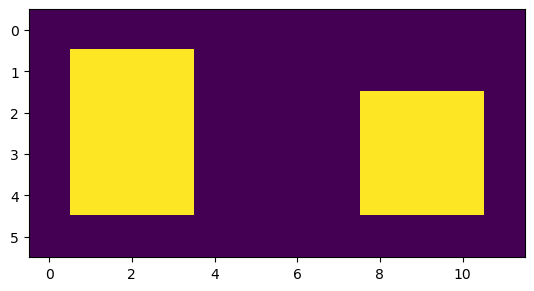

In [2]:
img = np.zeros((6,12), np.uint8)
img[1:5,1:4]=img[2:5,8:11] = 1
plt.imshow(img)

In [11]:
def erode(img, kernel):
    rows, cols = img.shape
    krows, kcols = kernel.shape

    pad_rows = krows // 2
    pad_cols = kcols // 2
    
    padded_img = cv.copyMakeBorder(img, pad_rows, pad_rows, pad_cols, pad_cols, cv.BORDER_CONSTANT)
    
    output = np.zeros_like(img)
    
    for i in range (rows):
        for j in range (cols):
            roi = padded_img[i:i + krows, j:j + kcols]
            if np.array_equal(roi, kernel):
                output[i][j] = 1
            else:
                output[i][j] = 0
    
    return output

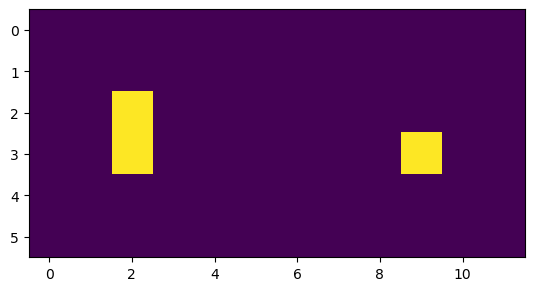

In [12]:
w = np.ones((5, 5), np.uint8)
kernel = np.ones((3, 3), np.uint8)
output1 = erode(img, kernel)
plt.imshow(output1)

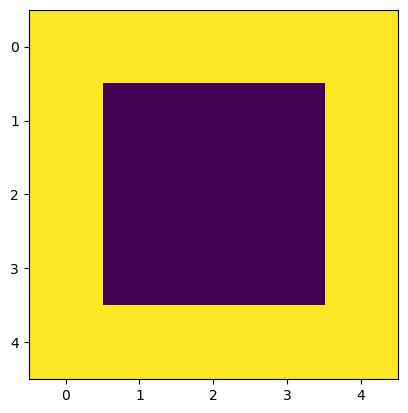

In [10]:
complement = 1 - img
k = (w.shape[0] - kernel.shape[0]) // 2
padded_kernel = cv.copyMakeBorder(kernel, k, k, k, k, cv.BORDER_CONSTANT)
diff = w - padded_kernel
plt.imshow(diff)

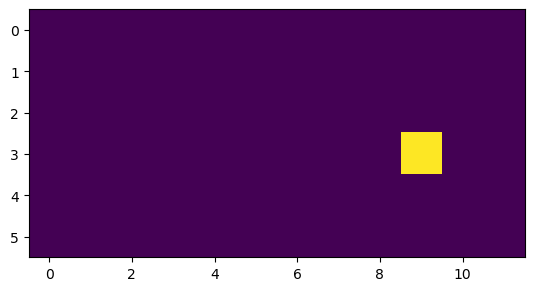

In [6]:
output2 = erode(complement, diff)
plt.imshow(output2)

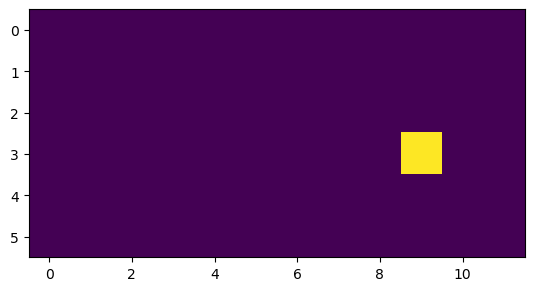

In [7]:
final = np.bitwise_and(output1, output2)
plt.imshow(final)